# Twitter US Airline Sentiment - Problem Statement

## **Description**
### **Background and Context**
Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.

Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

**Data Description**
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset**:
The dataset has the following columns:

- tweet_id
- airline_sentiment
- airline_sentiment_confidence
- negativereason
- negativereason_confidence
- airline
- airline_sentiment_gold
- name
- negativereason_gold
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

**Objective**
To implement the techniques learned as a part of the course.

**Learning Outcomes**
- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model

# **Steps and tasks**
### 1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)

In [1]:
# import libraries  (Will trim this list later to just those that are needed)
import re                                         #Used for Text PreProcessing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

from wordcloud import WordCloud, STOPWORDS           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords, wordnet                                # Used for removal of stop words

from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer

import warnings                                                           
#warnings.filterwarnings("ignore")   # I'll turn this on when I run this at the end.
#pd.options.mode.chained_assignment = None  # I'll turn this on when I run this at the end.


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
# NLTK extra step.

#  Was tired of the pink message telling me I'd already downloaded the 
#  components of nltk.
#   Modified this: https://stackoverflow.com/questions/23704510/how-do-i-test-whether-an-nltk-resource-is-already-installed-on-the-machine-runni

try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')

In [3]:
# load the data
data = pd.read_csv("Tweets.csv")

# print the shape of the data
print("The shape of the data is: ", data.shape)

# Describe the data.
data.describe()

The shape of the data is:  (14640, 15)


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [4]:
data.head(4).style.hide_index()

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
570306133677760513,neutral,1.000000,nan,nan,Virgin America,nan,cairdin,nan,0,@VirginAmerica What @dhepburn said.,nan,2015-02-24 11:35:52 -0800,nan,Eastern Time (US & Canada)
570301130888122368,positive,0.348600,nan,0.000000,Virgin America,nan,jnardino,nan,0,@VirginAmerica plus you've added commercials to the experience... tacky.,nan,2015-02-24 11:15:59 -0800,nan,Pacific Time (US & Canada)
570301083672813571,neutral,0.683700,nan,nan,Virgin America,nan,yvonnalynn,nan,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,nan,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.000000,Bad Flight,0.703300,Virgin America,nan,jnardino,nan,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",nan,2015-02-24 11:15:36 -0800,nan,Pacific Time (US & Canada)


##  2. Do Exploratory data analysis (EDA) based on the below statement. (9 Marks)
 ###  a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.

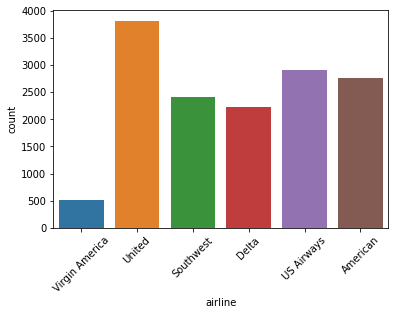

In [5]:
# Tweets by airline
subset_vars = ['airline_sentiment', 'airline']
groupby_var = 'airline'

unwanted_var = list(set(subset_vars).difference([groupby_var]))[0]

sns.countplot(data=data, x=groupby_var)
plt.xticks(rotation=45)
plt.show()

In [6]:
# In tabular form as well
tweets_by_airline = data[subset_vars].groupby(groupby_var).count().rename(columns={unwanted_var:'count'}).reset_index()
tweets_by_airline.style.hide_index()

airline,count
American,2759
Delta,2222
Southwest,2420
US Airways,2913
United,3822
Virgin America,504


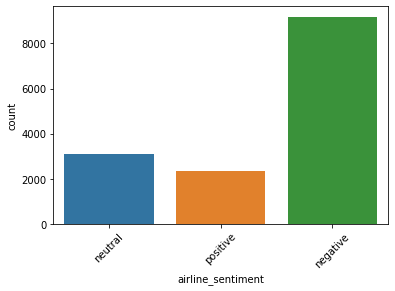

In [7]:
# Tweets by sentiment
subset_vars = ['airline_sentiment', 'airline']
groupby_var = 'airline_sentiment'

unwanted_var = list(set(subset_vars).difference([groupby_var]))[0]

sns.countplot(data=data, x=groupby_var)
plt.xticks(rotation=45)
plt.show()

In [8]:
# In tabular form as well
tweets_by_airline = data[subset_vars].groupby(groupby_var).count().rename(columns={unwanted_var:'count'}).reset_index()
tweets_by_airline.style.hide_index()

airline_sentiment,count
negative,9178
neutral,3099
positive,2363


### b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.

In [9]:
def tweet_sentiment_for_airline(airline_name):
    subset_data = data[data['airline']==airline_name]
    
    subset_vars = ['airline_sentiment', 'airline']
    groupby_var = 'airline_sentiment'

    unwanted_var = list(set(subset_vars).difference([groupby_var]))[0]

    sns.countplot(data=subset_data, x=groupby_var, order=sorted(data[groupby_var].unique()))
    plt.xticks(rotation=45)
    plt.show()


For the airline named:  Delta


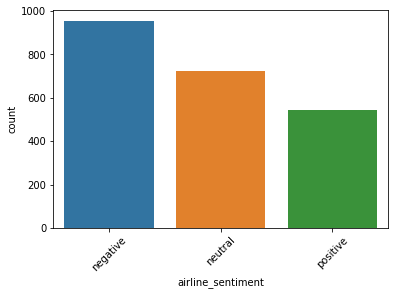


For the airline named:  US Airways


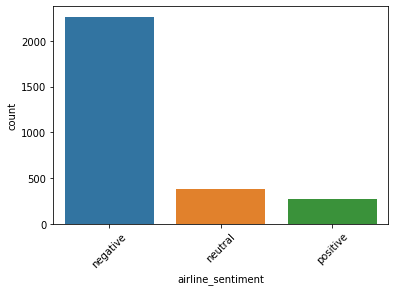


For the airline named:  United


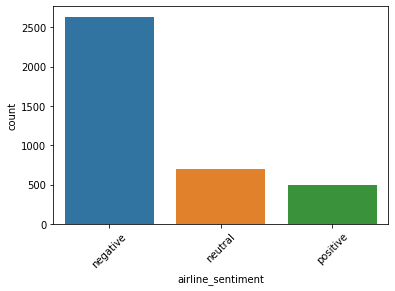


For the airline named:  American


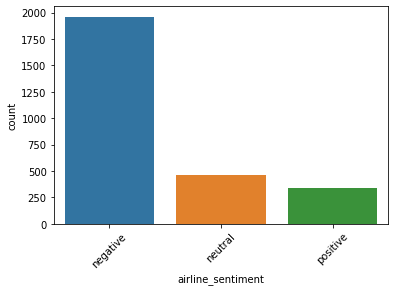


For the airline named:  Southwest


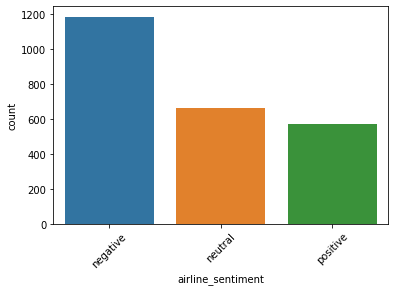


For the airline named:  Virgin America


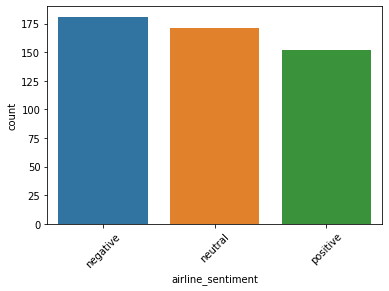

In [10]:
airlines = set(data['airline'])
for airline_name in airlines:
    print("\nFor the airline named: ", airline_name)
    tweet_sentiment_for_airline(airline_name)

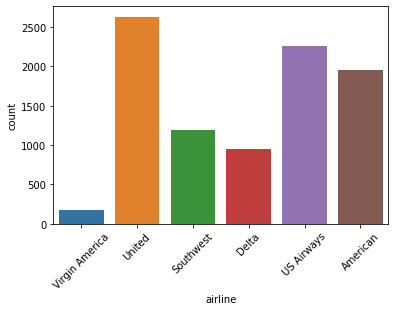

In [11]:
# Tweets by airline, negative only
subset_vars = ['airline_sentiment', 'airline']
groupby_var = 'airline'

unwanted_var = list(set(subset_vars).difference([groupby_var]))[0]
subset_data = data[data[unwanted_var]=='negative']

sns.countplot(data=subset_data, x=groupby_var)
plt.xticks(rotation=45)
plt.show()

### c. Plot the word cloud graph of tweets for positive and negative sentiment separately.

In [12]:
def show_wordcloud(sentiment, word_var='text', subset_var='airline_sentiment', data=data):
    subset_data = data[data['airline_sentiment']=='negative']

    text = ' '.join(subset_data[word_var].astype(str).tolist())
    stopwords = set(STOPWORDS)

    fig_wordcloud = WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    title = '{} tweetcloud'.format(sentiment)
    plt.title(title, fontsize=30)
    plt.show()

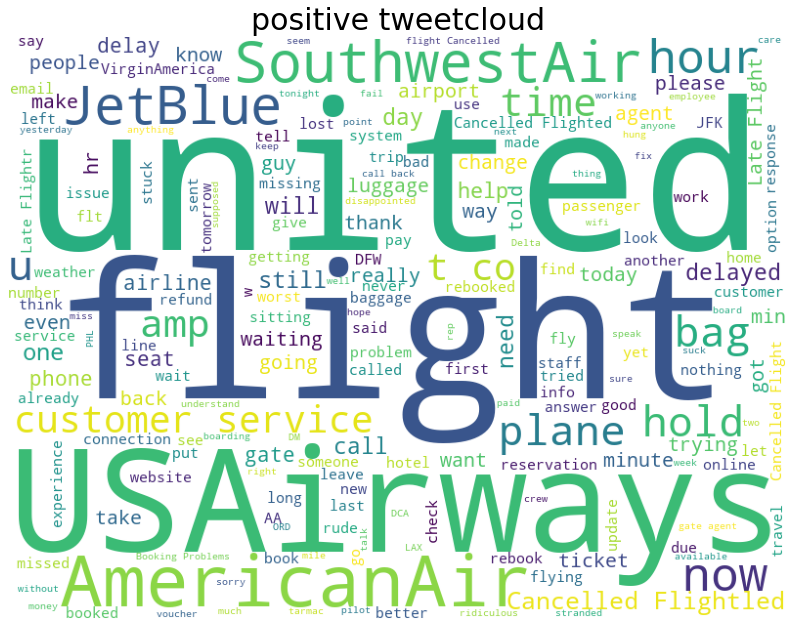

In [13]:
show_wordcloud('positive')

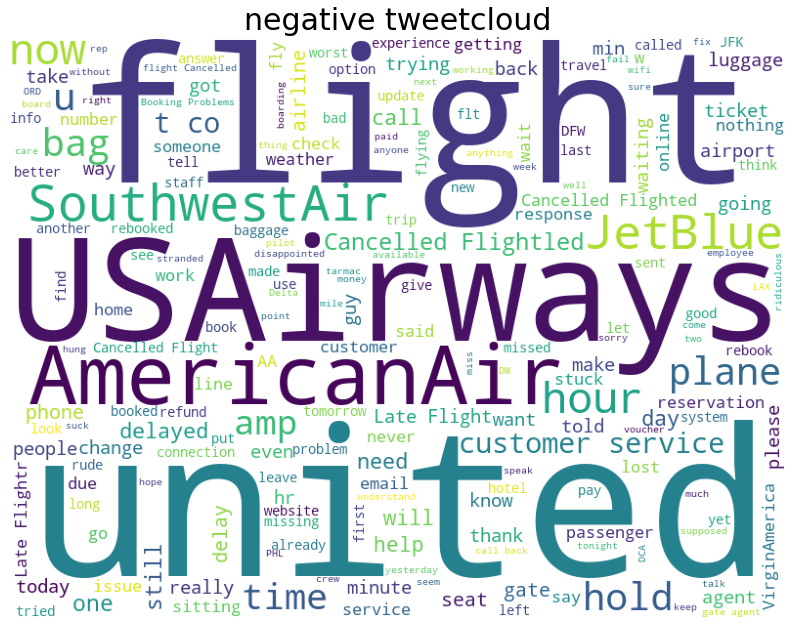

In [14]:
show_wordcloud('negative')

##  3. Understand of data columns: (3 Marks)
###  a. Drop all other columns except “text” and “airline_sentiment”.

In [15]:
chosen_col = ['text', 'airline_sentiment']
orig_data = data.copy()
data = data[chosen_col]

###  b. Check the shape of the data.

In [16]:
data.shape

(14640, 2)

 ##  3. Print the first 5 rows of data. 

In [17]:
data.head(5).style.hide_index()

text,airline_sentiment
@VirginAmerica What @dhepburn said.,neutral
@VirginAmerica plus you've added commercials to the experience... tacky.,positive
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
@VirginAmerica and it's a really big bad thing about it,negative


##  4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
###  a. Html tag removal.

In [18]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return(stripped_text)

In [19]:
new_column = 'html_tag_removed'
source_col = 'text'

In [20]:
# Loop method, for when 'apply + lambda' route fails.

# # I couldn't get my functions to apply in a clean manner, so I settled for the old loop.
# new_list = []

# for row in data[source_col]:
#     new_list.append(strip_html_tags(row))
    
# data[new_column] = new_list
# data.head(3).style.hide_index()

In [21]:
data[new_column] = data.loc[:, source_col].apply(lambda x: strip_html_tags(x))
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/1013306712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data.loc[:, source_col].apply(lambda x: strip_html_tags(x))


text,airline_sentiment,html_tag_removed
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!


It didn't look like there was any difference between the two columns, so I wanted to run this little test.

In [22]:
if data[source_col].equals(data[new_column]):
    print("No difference between the '{orig}' and the '{new}' column.".format(orig=source_col, new=new_column))
else:
    print("There is a difference between the {orig} and the {new} column.".format(orig=source_col, new=new_column))

There is a difference between the text and the html_tag_removed column.


  ###  b. Tokenization.  

In [23]:
def tokenizer_func(text):
    tokenizer=ToktokTokenizer()
    tokens=tokenizer.tokenize(text)
    return tokens

In [24]:
new_column = 'tokenized_text'
source_col = 'text'

In [25]:
# Loop method, for when 'apply + lambda' route fails.

# # I couldn't get my functions to apply in a clean manner, so I settled for the old loop.
# new_list = []

# for row in data[source_col]:
#     new_list.append(tokenizer_func(row))
    
# data[new_column] = new_list
# data.head(3).style.hide_index()

In [26]:
data[new_column] = data[source_col].apply(lambda x: tokenizer_func(x))

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/669520754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].apply(lambda x: tokenizer_func(x))


In [27]:
data.head(3).style.hide_index()

text,airline_sentiment,html_tag_removed,tokenized_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']"
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']"
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']"


  ###  c. Remove the numbers.  

In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

In [29]:
new_column = 'removed_numbers_text'
source_col = 'text'

In [30]:
data[new_column] = data[source_col].apply(lambda x: remove_numbers(x))
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/2569630708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].apply(lambda x: remove_numbers(x))


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!


###  d. Removal of Special Characters and Punctuations.  

In [31]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [32]:
new_column = 'removed_spec_char_text'
source_col = 'text'

In [33]:
data[new_column] = data[source_col].apply(lambda x: remove_special_characters(x))
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/574976117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].apply(lambda x: remove_special_characters(x))


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text,removed_spec_char_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials to the experience tacky
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didnt today Must mean I need to take another trip


###  e. Removal of stopwords  

*Note that for all the other pre-processing steps I tried to show them in isolation.  However, for this one, I need to use a list of tokenized words instead of the raw "text" field that I've been using for all the others.*

In [34]:
stopwords_set = stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    
    for word in words:
        if word not in stopwords_set:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [35]:
new_column = 'removed_stopwords_text'
source_col = 'tokenized_text'

In [36]:
data[new_column] = data[source_col].apply(lambda x: remove_stopwords(x))
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/4128518804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].apply(lambda x: remove_stopwords(x))


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text,removed_spec_char_text,removed_stopwords_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']"
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials to the experience tacky,"['@VirginAmerica', 'plus', ""'"", 'added', 'commercials', 'experience', '...', 'tacky', '.']"
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didnt today Must mean I need to take another trip,"['@VirginAmerica', 'I', ""'"", 'today', '...', 'Must', 'mean', 'I', 'need', 'take', 'another', 'trip', '!']"


###  f. Conversion to lowercase.

In [37]:
new_column = 'lowercase_text'
source_col = 'text'

data[new_column] = data[source_col].str.lower()
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/497465715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].str.lower()


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text,removed_spec_char_text,removed_stopwords_text,lowercase_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@virginamerica what @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials to the experience tacky,"['@VirginAmerica', 'plus', ""'"", 'added', 'commercials', 'experience', '...', 'tacky', '.']",@virginamerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didnt today Must mean I need to take another trip,"['@VirginAmerica', 'I', ""'"", 'today', '...', 'Must', 'mean', 'I', 'need', 'take', 'another', 'trip', '!']",@virginamerica i didn't today... must mean i need to take another trip!


###  g. Lemmatize or stemming.  

*Note that for most of the other pre-processing steps I tried to show them in isolation.  However, for this one, I need to use a list of tokenized words instead of the raw "text" field that I've been using for all the others.*

In [38]:
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [39]:
new_column = 'lemmatized_text'
source_col = 'tokenized_text'

In [40]:
data[new_column] = data[source_col].apply(lambda x: lemmatize_list(x))
data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/3344627661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = data[source_col].apply(lambda x: lemmatize_list(x))


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text,removed_spec_char_text,removed_stopwords_text,lowercase_text,lemmatized_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@virginamerica what @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']"
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials to the experience tacky,"['@VirginAmerica', 'plus', ""'"", 'added', 'commercials', 'experience', '...', 'tacky', '.']",@virginamerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercial', 'to', 'the', 'experience', '...', 'tacky', '.']"
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didnt today Must mean I need to take another trip,"['@VirginAmerica', 'I', ""'"", 'today', '...', 'Must', 'mean', 'I', 'need', 'take', 'another', 'trip', '!']",@virginamerica i didn't today... must mean i need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']"


###  h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)

In [41]:
# I previously did the pre-processing steps in isolation so I could see and could demonstrate each one individually.
#  I'll now try to go chain these together.

source_col = 'text'
new_column = 'preprocessed_text'
data[new_column] = (data.loc[:, source_col]
                    .apply(lambda x: strip_html_tags(x))
                    .apply(lambda x: remove_numbers(x))
                    .apply(lambda x: remove_special_characters(x))
                    .str.lower()
                    .apply(lambda x: tokenizer_func(x))
                    .apply(lambda x: remove_stopwords(x))
                    .apply(lambda x: lemmatize_list(x))
                    .str.join(' ')
                   )

data.head(3).style.hide_index()

C:\Users\Owner\AppData\Local\Temp/ipykernel_2592/855950212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[new_column] = (data.loc[:, source_col]


text,airline_sentiment,html_tag_removed,tokenized_text,removed_numbers_text,removed_spec_char_text,removed_stopwords_text,lowercase_text,lemmatized_text,preprocessed_text
@VirginAmerica What @dhepburn said.,neutral,@VirginAmerica What @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@VirginAmerica What @dhepburn said.,VirginAmerica What dhepburn said,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",@virginamerica what @dhepburn said.,"['@VirginAmerica', 'What', '@dhepburn', 'said', '.']",virginamerica dhepburn said
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercials', 'to', 'the', 'experience', '...', 'tacky', '.']",@VirginAmerica plus you've added commercials to the experience... tacky.,VirginAmerica plus youve added commercials to the experience tacky,"['@VirginAmerica', 'plus', ""'"", 'added', 'commercials', 'experience', '...', 'tacky', '.']",@virginamerica plus you've added commercials to the experience... tacky.,"['@VirginAmerica', 'plus', 'you', ""'"", 've', 'added', 'commercial', 'to', 'the', 'experience', '...', 'tacky', '.']",virginamerica plus youve added commercial experience tacky
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",@VirginAmerica I didn't today... Must mean I need to take another trip!,VirginAmerica I didnt today Must mean I need to take another trip,"['@VirginAmerica', 'I', ""'"", 'today', '...', 'Must', 'mean', 'I', 'need', 'take', 'another', 'trip', '!']",@virginamerica i didn't today... must mean i need to take another trip!,"['@VirginAmerica', 'I', 'didn', ""'"", 't', 'today', '...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip', '!']",virginamerica didnt today must mean need take another trip


In [42]:
# I'll go ahead and drop those isolated pre-processed columns.
#  But I'll save them in a separate data frame just in case.
preprocessed_data = data.copy()
intermediate_columns = ([
    'html_tag_removed',
    'removed_numbers_text',
    'removed_spec_char_text',
    'lowercase_text',
    'tokenized_text',
    'removed_stopwords_text',
    'lemmatized_text'
])

data = data.drop(columns=intermediate_columns)

###  i. Print the first 5 rows of data after pre-processing.

In [43]:
data.head(5).style.hide_index()

text,airline_sentiment,preprocessed_text
@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
@VirginAmerica plus you've added commercials to the experience... tacky.,positive,virginamerica plus youve added commercial experience tacky
@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral,virginamerica didnt today must mean need take another trip
"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative,virginamerica really aggressive blast obnoxious entertainment guest face little recourse
@VirginAmerica and it's a really big bad thing about it,negative,virginamerica really big bad thing


## 5. Vectorization: (8 Marks)

###   a. Use CountVectorizer.

In [44]:
#bow_vec = CountVectorizer()
bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
source_col = 'preprocessed_text'
data_features = bow_vec.fit_transform(data[source_col])

countvectorizer_features = data_features.toarray()

###   b. Use TfidfVectorizer.   

In [45]:
# Using TfidfVectorizer to convert text data to numbers.
source_col = 'preprocessed_text'
vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data[source_col])

data_features = data_features.toarray()

In [46]:
data_features.shape

(14640, 2000)

In [47]:
data.shape

(14640, 3)

In [48]:
data.head()

,text,airline_sentiment,preprocessed_text
0,@VirginAmerica What @dhepburn said.,neutral,virginamerica dhepburn said
1,@VirginAmerica plus you've added commercials t...,positive,virginamerica plus youve added commercial expe...
2,@VirginAmerica I didn't today... Must mean I n...,neutral,virginamerica didnt today must mean need take ...
3,@VirginAmerica it's really aggressive to blast...,negative,virginamerica really aggressive blast obnoxiou...
4,@VirginAmerica and it's a really big bad thing...,negative,virginamerica really big bad thing


## 6. Fit, tune (optimize the parameter to improve the accuracy) & evaluate the model using both types of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)

In [49]:
# Doing separate test-train split for countvectorizer
X=countvectorizer_features
y=data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6826502732240437


In [51]:
base_ln = [x for x in range(1, 25)]

In [52]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

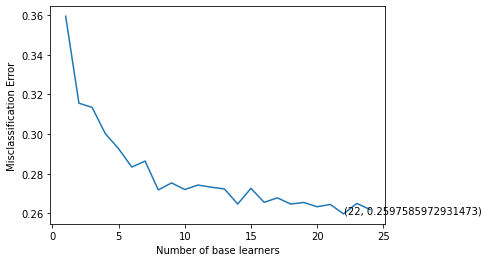

In [53]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [54]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7568306010928961

In [55]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result
result_countv = result.copy()                  # in case it needs to be compared to the other vectorizer

[[2492  227   95]
 [ 395  416   73]
 [ 174  104  416]]
0.7568306010928962


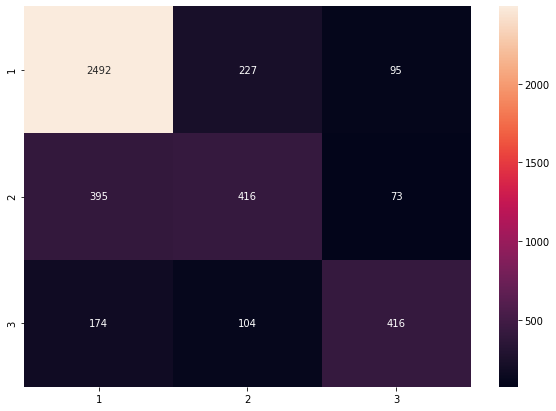

In [56]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7));
sns.heatmap(df_cm, annot=True, fmt='g');

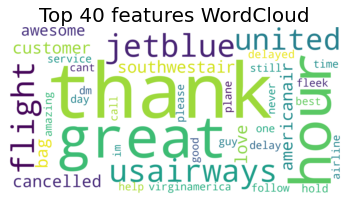

In [57]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

In [58]:
# Doing separate test-train split for TFIDF
X=data_features
y=data['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6799863387978142


In [60]:
base_ln = [x for x in range(1, 25)]

# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

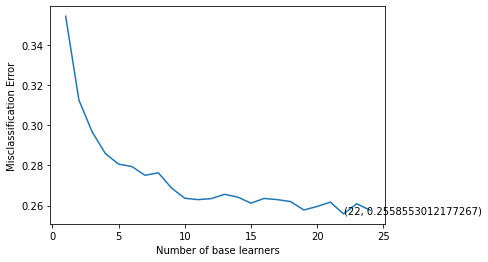

In [61]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [62]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7525045537340619

In [63]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result
result_tfidfv = result.copy()                  # in case it needs to be compared to the other vectorizer

[[2598  142   74]
 [ 485  339   60]
 [ 225  101  368]]
0.752504553734062


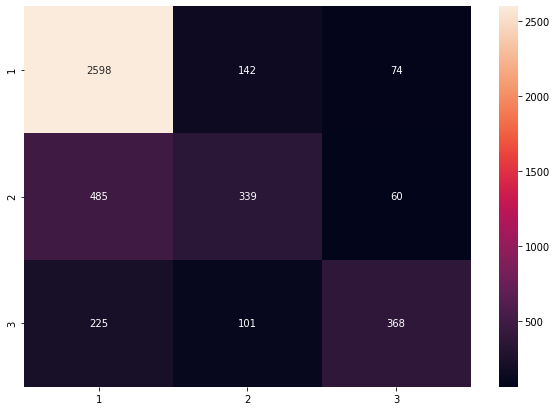

In [64]:
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7));
sns.heatmap(df_cm, annot=True, fmt='g');

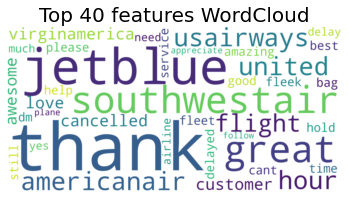

In [65]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## 7. Summarize your understanding of the application of Various Pre-processing and Vectorization and the performance of your model on this dataset. (6 Marks)

In [66]:
print("I've learned how to do some basic natural language processing during this module.", end='\n\n')

print("For the CountVectorizer, the untuned model had performance of 0.679 while the tuned one had accuracy of 0.753")
print("For the CountVectorizer, the untuned model had performance of 0.687 while the tuned one had accuracy of 0.760")

I've learned how to do some basic natural language processing during this module.

For the CountVectorizer, the untuned model had performance of 0.679 while the tuned one had accuracy of 0.753
For the CountVectorizer, the untuned model had performance of 0.687 while the tuned one had accuracy of 0.760


## 8. Overall notebook should have:  (4 Marks)
### a. Well commented code

In [67]:
# Inline and subtitle comments in code blocks.

###  b. Structure and flow

In [68]:
# In structure.  Lots of markdon cells based around the problem statement.

**Best Practices for the Notebook**
- The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
- The notebook should be run from start to finish in a sequential manner before submission.
- It is preferable to remove all warnings and errors before submission.

**Submission Guidelines**
1. The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
2. Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
4. Submission will not be evaluated if,
  1. it is submitted post-deadline, or,
  2. more than 2 files are submitted



##### Regards
##### Program Office
##### Happy Learning!

#### **Scoring guide (Rubric) - Twitter US Airline Sentiment**

| <u> Criteria </u>  | <u> Points </u> |
|-----------| ---------|
| <b> Data Summary </b> | |
| Add your view and opinion along with the problem statement, shape of the data, data description. | 4 |
| <b> Exploratory data analysis </b> | |
| Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.| 9 |
| <b> Understanding of Data Columns </b> | |
| Drop unnecessary columns, check shape of the data, print 1st few rows of data. | 3 |
| <b> Data Pre - Processing </b> | |
| Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing. | 12 |
| <b> Vectorization </b> | |
| Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model | 8 |
| <b> Modelling , tuning and Evaluation </b> | |
| - Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks) | 14 |
| <b> Conclusion </b> | |
| - Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset. | 6 |
| <b> Overall Structure and flow of Notebook </b> | |
| Structure and flow Well commented code | 4 |
| <b> Points	| 60 |